In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib_inline
import numpy as np
from numpy import sqrt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

Tabelle erstellen:

In [2]:
md = pd.read_csv('tables/md.csv')
# md_a = md.iloc[:, [0,1]]
print(md.to_latex(index = False, column_format= "c c", decimal=',')) 

\begin{tabular}{c c}
\toprule
 f/kHz &   U/V \\
\midrule
  20,0 & 0,085 \\
  22,5 & 0,110 \\
  25,0 & 0,150 \\
  27,0 & 0,190 \\
  30,0 & 0,310 \\
  32,8 & 0,800 \\
  33,3 & 1,200 \\
  34,1 & 1,900 \\
  35,4 & 2,000 \\
  36,0 & 1,600 \\
  36,9 & 0,840 \\
  38,3 & 0,530 \\
  39,3 & 0,410 \\
\bottomrule
\end{tabular}



Daten auswerten:

In [3]:
np.savetxt('tables/U.txt', md.values, header='nu/Hz U/V', fmt='%.3f')
nu, U = np.genfromtxt('tables/U.txt', unpack=True, skip_header=1)
U = U/(2*0.9892978920131985)            # Normierung 

# für den initial guess bei curvefit()
n = len(nu)                             # Anzahl der Daten
mean = sum(nu*U)/n                      # Mittelwert
sigma = np.sqrt(sum(U*(nu - mean)**2))  # Standardabweichung

# Ausgleichsrechung nach Gaußverteilung
def g(x,a,x0,b):
    return a*np.exp(-(x-x0)**2/(b))     # b = 2*sigma**2

para, pcov = curve_fit(g, nu, U, p0=[1,mean,sigma])
a, nu0, b = para
pcov = np.sqrt(np.diag(pcov))
fa, fnu0, fb = pcov
ua = ufloat(a, fa) 
ub = ufloat(b, fb)
unu0 = ufloat(nu0, fnu0)


Fehler berechnen:

In [4]:
print('a = (%.3f ± %.3f)' % (noms(ua), stds(ua)))
print('b = (%.3f ± %.3f)' % (noms(b), stds(ub)))
print('U0 =', g(nu0, a, nu0, b))

a = (1.000 ± 0.074)
b = (6.100 ± 1.218)
U0 = 1.0000033945665405


Plot erstellen:

(-0.05, 1.05)

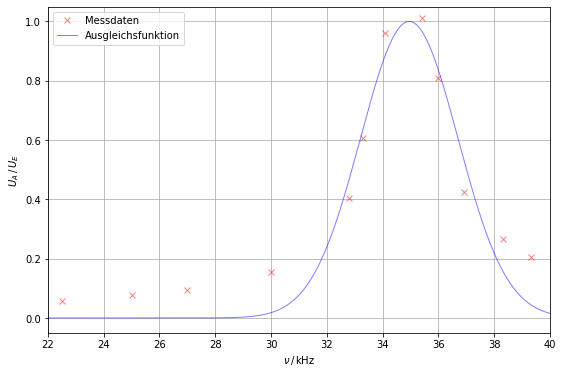

In [9]:
plt.figure(figsize=(9, 6))              # Größe des Plots

xx = np.linspace(18, 42, 10**4)         # Definitionsbereich

plt.plot(nu, U, 'xr', markersize=6 , label = 'Messdaten', alpha=0.5)
plt.plot(xx, g(xx, *para), '-b', linewidth = 1, label = 'Ausgleichsfunktion', alpha=0.5)
plt.xlabel(r'$\nu \, / \, \mathrm{kHz}$')
plt.ylabel(r'$U_A \, / \, U_E$')
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style
plt.xlim(22, 40)
plt.ylim(-0.05, 1.05)